-- when having too many columns; consider performing feature selection.


In [54]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import gdown

pd. set_option('display.max_columns', None)

In [55]:
file_id = "1YFXl0Bh34au4qnwHjkibmAbAZOPCcD-o"
output_file = "train.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

Downloading...
From: https://drive.google.com/uc?id=1YFXl0Bh34au4qnwHjkibmAbAZOPCcD-o
To: /content/train.csv
100%|██████████| 4.08M/4.08M [00:00<00:00, 101MB/s]


'train.csv'

#Loading Dataset

In [56]:
# Load the dataset
fake_news_data = pd.read_csv('train.csv')
fake_news_data.head(10)

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,NaN,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971,_5_,"[1, 0]",_NEG_
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,NEGATIVE,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604,_6_,"[0, 1]",_NEG_
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",NEGATIVE,-0.2,0.2,0.021023,0.077569,0.032182,0.038037,0.438594,_2_,"[0, 1]",_NEG_
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,NEGATIVE,-0.3,0.3,0.116767,0.099105,0.219329,0.051303,0.114302,_7_,"[0, 1]",_NEG_
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,NEGATIVE,-0.4,0.4,0.163977,0.101336,0.109979,0.330754,0.203412,_8_,"[1, 0]",_NEG_


#EDA

In [57]:
fake_news_data.shape

(11519, 25)

In [58]:
fake_news_data['sentiment_code'].value_counts()

sentiment_code
_NEG_    8564
_POS_    1414
Name: count, dtype: int64

In [59]:
fake_news_data.columns

Index(['ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job',
       'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts',
       'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
       'context', 'sentiment', 'sentiment_score', 'sentiment_magnitude',
       'anger', 'fear', 'joy', 'disgust', 'sad', 'speaker_id', 'list',
       'sentiment_code'],
      dtype='object')

In [60]:
# Check for missing values
fake_news_data.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3239
state_info              2486
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  112
sentiment               1541
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1541
dtype: int64

#Data Cleaning

In [61]:
# Drop rows with missing values
fake_news_data.dropna(subset=['sentiment_code'], inplace=True)

In [62]:
fake_news_data.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             2806
state_info              2157
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                   92
sentiment                  0
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code             0
dtype: int64

In [63]:
fake_news_data.drop(columns=['speaker_job', 'state_info', 'sentiment_code', 'speaker_id', 'list', 'ID'], inplace=True)

In [64]:
fake_news_data.describe(include='all')

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
count,9978,9978,9978,9978,9978,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9886,9978,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
unique,6,9961,3748,2862,24,NaN,NaN,NaN,NaN,NaN,4250,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,half-true,On changing the rules for filibusters on presi...,health-care,barack-obama,republican,NaN,NaN,NaN,NaN,NaN,a news release,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2051,3,383,471,4414,NaN,NaN,NaN,NaN,NaN,242,8564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,11.570856,13.366907,17.087994,16.392864,6.240229,NaN,NaN,-0.343496,0.488585,0.162641,0.137699,0.169535,0.207079,0.319501
std,NaN,NaN,NaN,NaN,NaN,19.000114,24.262174,35.719718,36.025761,16.211644,NaN,NaN,0.340047,0.305794,0.117470,0.109094,0.154117,0.162688,0.169609
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.600000,0.300000,0.073903,0.062700,0.055778,0.079516,0.187175
50%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,1.000000,NaN,NaN,-0.400000,0.500000,0.133104,0.108012,0.120117,0.163496,0.296602
75%,NaN,NaN,NaN,NaN,NaN,12.000000,15.000000,13.000000,11.000000,5.000000,NaN,NaN,-0.200000,0.700000,0.222119,0.183604,0.234927,0.296648,0.429287


In [65]:
fake_news_data['context'].value_counts()

context
a news release                                                     242
an interview                                                       221
a press release                                                    209
a speech                                                           197
a TV ad                                                            185
                                                                  ... 
introduction to online petition to lower state's grocery taxes.      1
a talk show                                                          1
a surreptitiously recorded speech to donors at a fundraiser          1
a news release reacting to FitzGerald's run for governor             1
a speech on the economy                                              1
Name: count, Length: 4250, dtype: int64

In [66]:
# mode_value = fake_news_data['context'].mode
# print(mode_value)
fake_news_data['context'].fillna('a news release', inplace=True)

In [67]:
fake_news_data.isna().sum()

label                   0
statement               0
subject                 0
speaker                 0
party_affiliation       0
barely_true_counts      0
false_counts            0
half_true_counts        0
mostly_true_counts      0
pants_on_fire_counts    0
context                 0
sentiment               0
sentiment_score         0
sentiment_magnitude     0
anger                   0
fear                    0
joy                     0
disgust                 0
sad                     0
dtype: int64

In [68]:
filtered_df = fake_news_data[(fake_news_data['context'].isnull())]
filtered_df

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad


In [70]:
fake_news_data.head(5)

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,The Chicago Bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971


In [71]:
duplicates = fake_news_data[fake_news_data.duplicated()]
duplicates.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
4838,half-true,During Sherrod Browns past decade as a D.C. po...,"economy,job-accomplishments,jobs",josh-mandel,republican,4.0,5.0,4.0,5.0,6.0,a news release,NEGATIVE,-0.7,1.5,0.092383,0.071597,0.054982,0.285451,0.728939


In [18]:
fake_news_data.drop_duplicates(inplace=True)

In [19]:
fake_news_data.describe()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
mean,11.571615,13.367746,17.089305,16.394006,6.240253,-0.343460,0.488484,0.162648,0.137706,0.169547,0.207071,0.319460
std,19.000916,24.263245,35.721268,36.027386,16.212456,0.340046,0.305642,0.117474,0.109098,0.154121,0.162694,0.169568
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,0.300000,0.073903,0.062698,0.055789,0.079504,0.187159
50%,2.000000,2.000000,3.000000,3.000000,1.000000,-0.400000,0.500000,0.133117,0.108030,0.120118,0.163490,0.296537
75%,12.000000,15.000000,13.000000,11.000000,5.000000,-0.200000,0.700000,0.222208,0.183607,0.234936,0.296650,0.429246
max,70.000000,114.000000,160.000000,163.000000,105.000000,0.900000,7.100000,0.931034,0.931034,0.918537,0.931034,0.963480


In [20]:
fake_news_data.dtypes

label                    object
statement                object
subject                  object
speaker                  object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
sentiment                object
sentiment_score         float64
sentiment_magnitude     float64
anger                   float64
fear                    float64
joy                     float64
disgust                 float64
sad                     float64
dtype: object

In [21]:
# Check the shape of the data
fake_news_data.shape

fake_news_drop = fake_news_data
fake_news_drop

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,The Chicago Bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,a press conference,NEGATIVE,-0.2,0.2,0.039024,0.103790,0.104699,0.046181,0.758238
11515,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy,NEGATIVE,-0.7,0.7,0.064967,0.180882,0.074947,0.054953,0.710395
11516,true,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,none,0.0,1.0,0.0,2.0,0.0,a television ad,NEGATIVE,-0.8,0.8,0.085547,0.053017,0.248317,0.319548,0.354095
11517,false,A new poll shows 62 percent support the presid...,health-care,americans-united-change,none,1.0,4.0,4.0,1.0,0.0,an Internet ad.,POSITIVE,0.1,0.5,0.074988,0.148645,0.316695,0.062320,0.169428


In [22]:
#Remove puntuations
import re

def remove_puntuation(text):
    return re.sub(r'[^\w\s]', '', text)

fake_news_data['statement'] = fake_news_data['statement'].apply(remove_puntuation)

In [23]:
fake_news_data['statement'] = fake_news_data['statement'].str.lower()

In [24]:
fake_news_data.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,says the annies list political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,when did the decline of coal start it started ...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,hillary clinton agrees with john mccain by vot...,foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,the chicago bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971


In [25]:
# Analyze the distribution of classes (labels)
fake_news_drop['label'].value_counts()

label
half-true      2050
false          1933
mostly-true    1915
barely-true    1678
true           1576
pants-fire      825
Name: count, dtype: int64

In [26]:
# Analyze the distribution of classes (party_affiliation)
fake_news_drop['party_affiliation'].value_counts()

party_affiliation
republican                      4413
democrat                        3229
none                            1699
organization                     207
independent                      143
newsmaker                         54
libertarian                       42
activist                          37
journalist                        35
columnist                         33
talk-show-host                    24
state-official                    18
labor-leader                      12
tea-party-member                   9
business-leader                    9
education-official                 3
green                              3
liberal-party-canada               1
government-body                    1
Moderate                           1
democratic-farmer-labor            1
ocean-state-tea-party-action       1
constitution-party                 1
county-commissioner                1
Name: count, dtype: int64

In [27]:
fake_news_drop.dtypes

label                    object
statement                object
subject                  object
speaker                  object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
sentiment                object
sentiment_score         float64
sentiment_magnitude     float64
anger                   float64
fear                    float64
joy                     float64
disgust                 float64
sad                     float64
dtype: object

In [28]:
# Analyze the distribution of classes (sentiment)
fake_news_drop['sentiment'].value_counts()

sentiment
NEGATIVE    8563
POSITIVE    1414
Name: count, dtype: int64

In [29]:
fake_news_drop['sentiment'] = fake_news_drop['sentiment'].replace('POSITIVE', 'Genuine')
fake_news_drop['sentiment'] = fake_news_drop['sentiment'].replace('NEGATIVE', 'Fake')

In [30]:
fake_news_drop['sentiment'].value_counts()

sentiment
Fake       8563
Genuine    1414
Name: count, dtype: int64

## Outliers:

In [31]:
numerical_columns = fake_news_drop.select_dtypes(include='number').columns.tolist()
numerical_columns

['barely_true_counts',
 'false_counts',
 'half_true_counts',
 'mostly_true_counts',
 'pants_on_fire_counts',
 'sentiment_score',
 'sentiment_magnitude',
 'anger',
 'fear',
 'joy',
 'disgust',
 'sad']

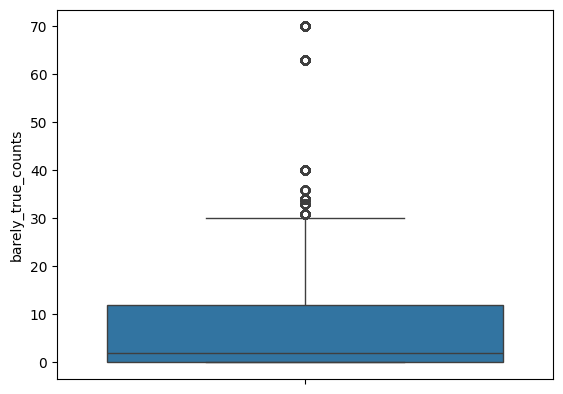

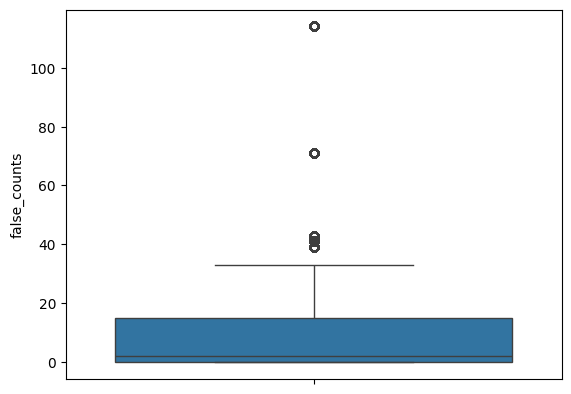

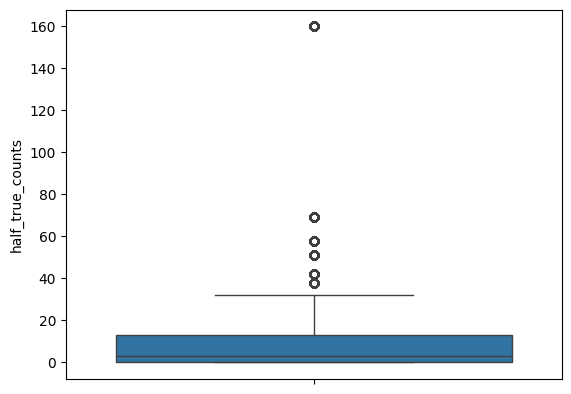

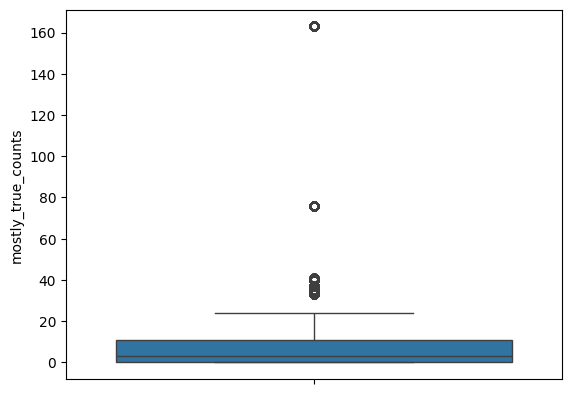

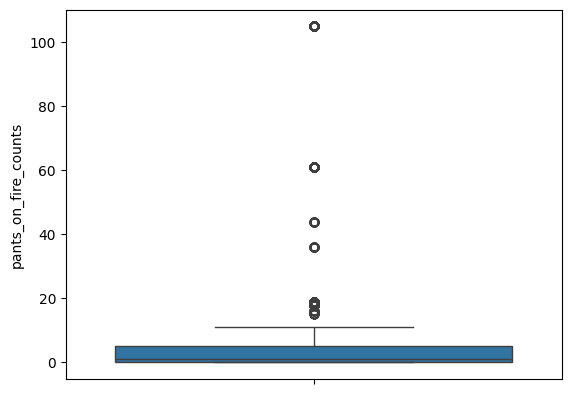

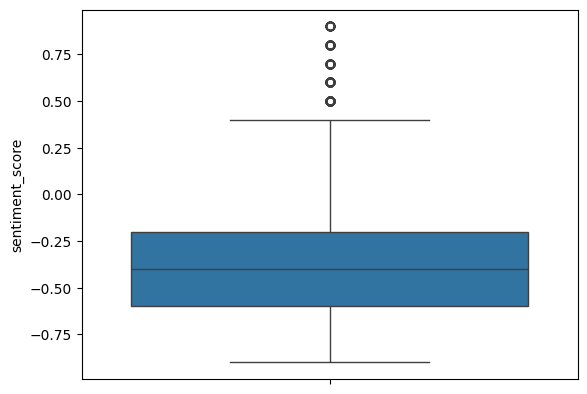

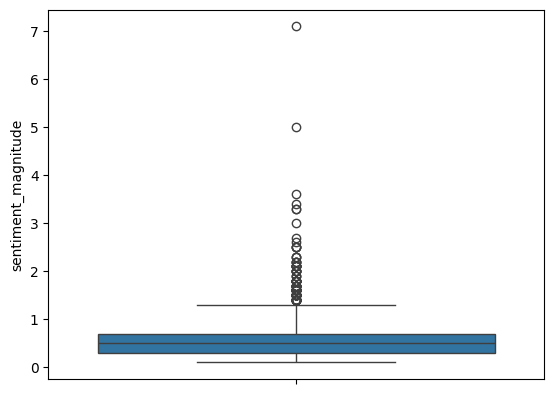

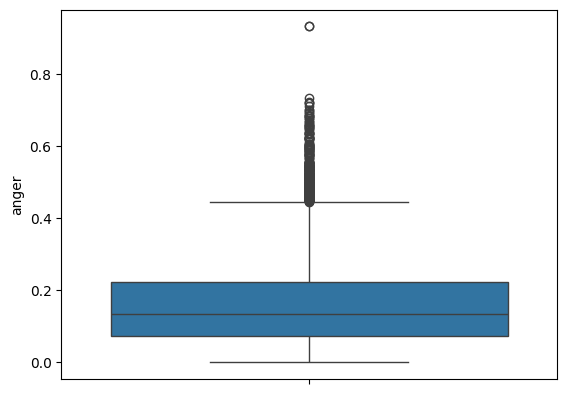

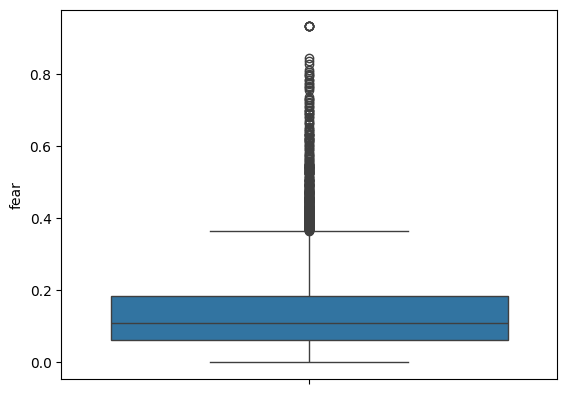

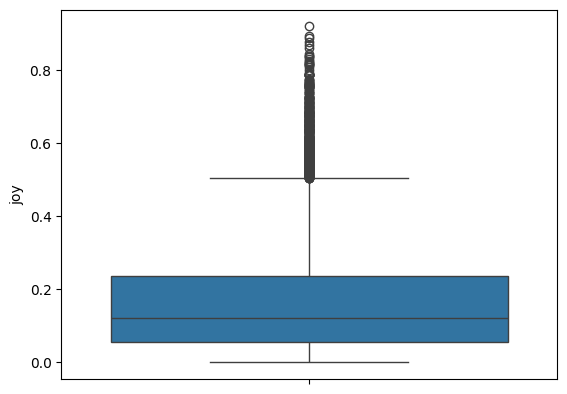

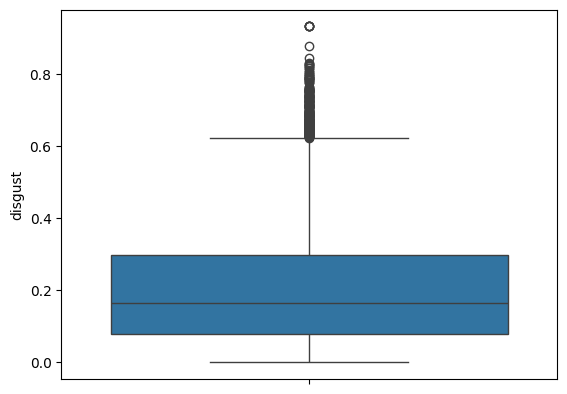

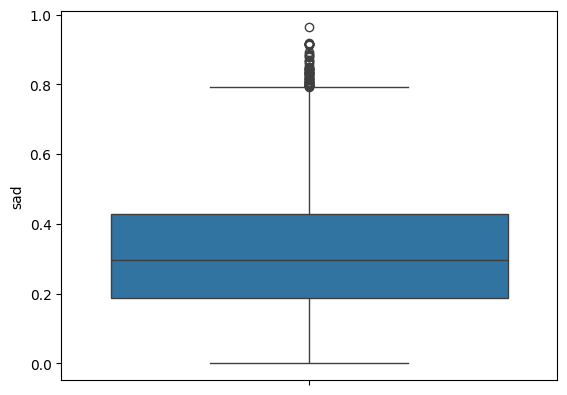

In [32]:
#boxplot
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_columns:
  column = fake_news_drop[i]
  sns.boxplot(column)
  plt.show()

In [33]:
fake_news_drop.shape

(9977, 19)

In [34]:
import numpy as np

def remove_outliers(df, columns, threshold=4):
    cleaned_df = df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(cleaned_df[col]):
            z_scores = np.abs((cleaned_df[col] - cleaned_df[col].mean()) / cleaned_df[col].std())
            cleaned_df = cleaned_df[z_scores < threshold]
    return cleaned_df

fake_news_filtered_data = remove_outliers(fake_news_drop, fake_news_drop.select_dtypes(include='number').columns.tolist())

In [35]:
fake_news_filtered_data.shape

(8707, 19)

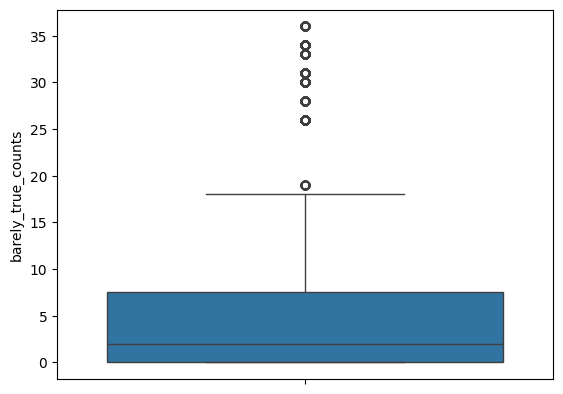

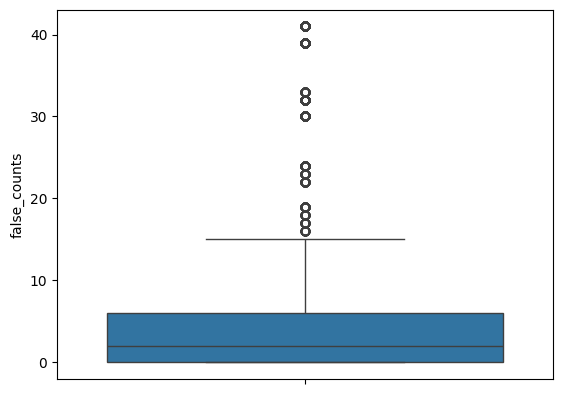

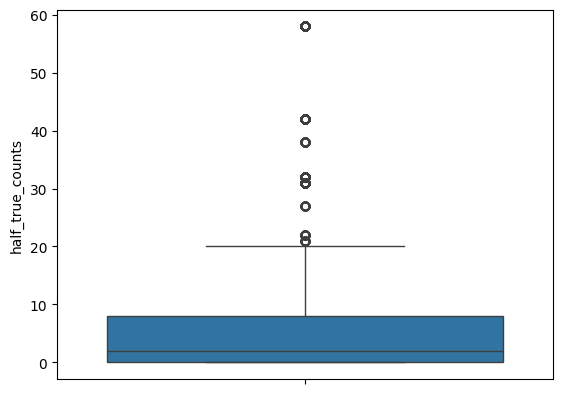

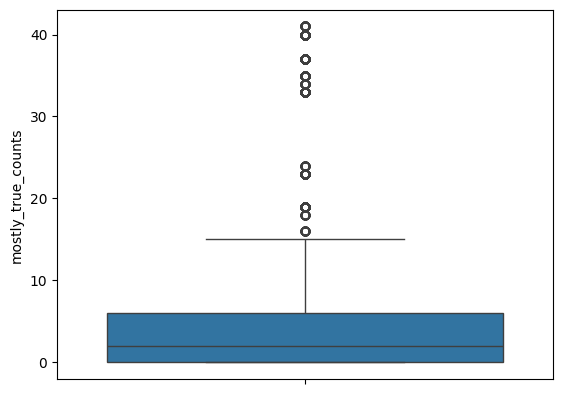

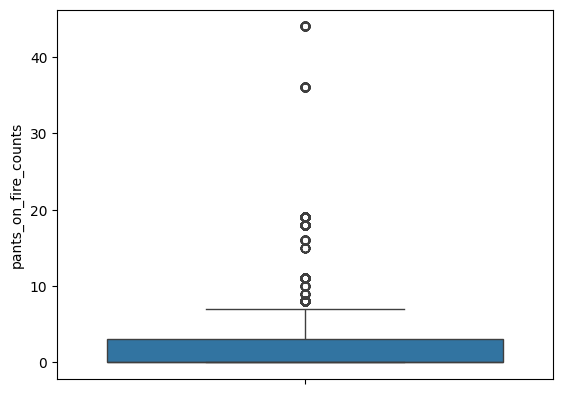

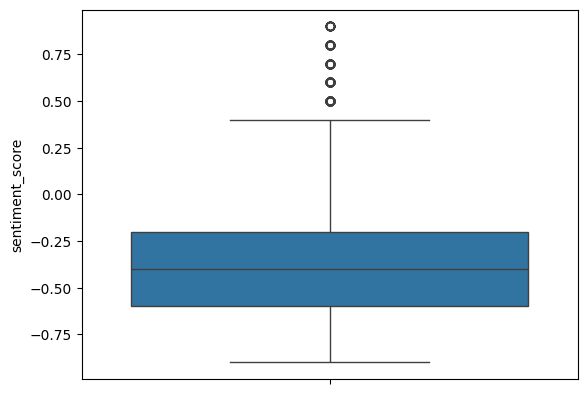

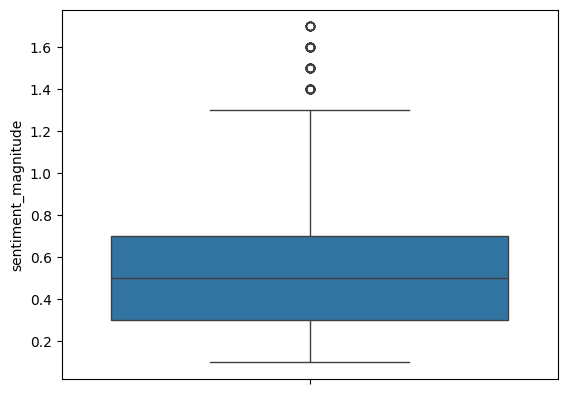

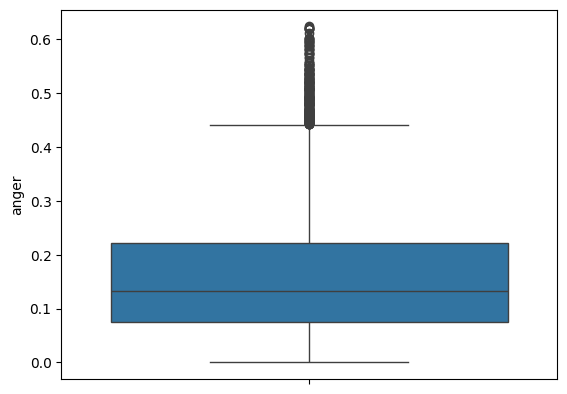

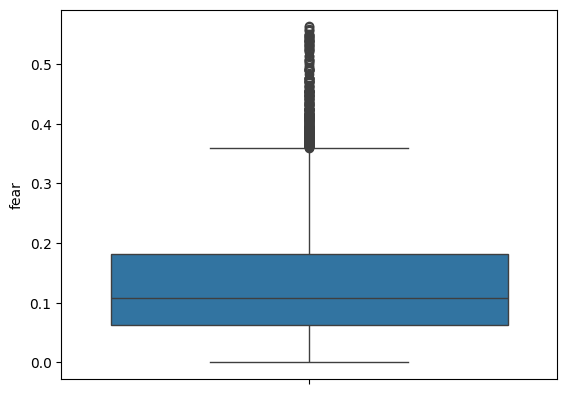

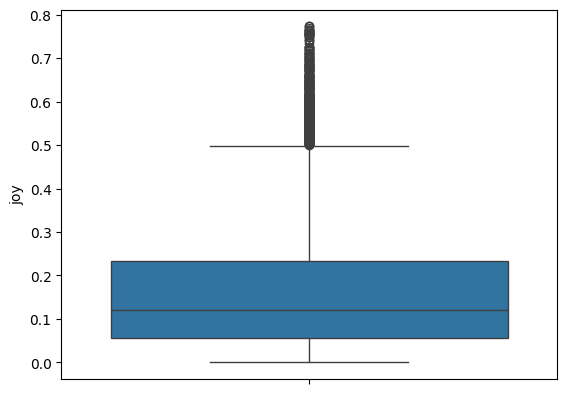

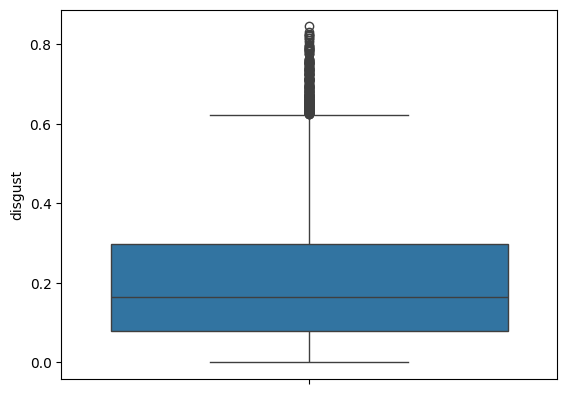

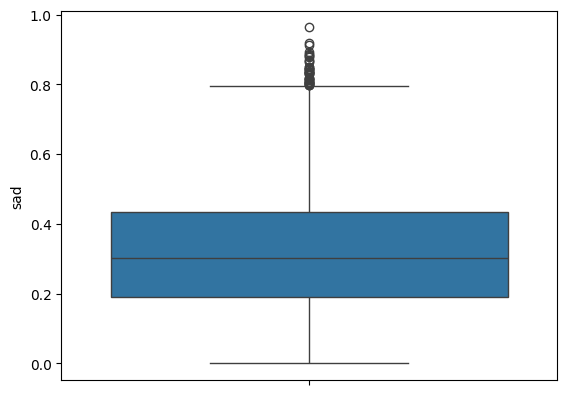

In [36]:
#boxplot
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_columns:
  column = fake_news_filtered_data[i]
  sns.boxplot(column)
  plt.show()

In [37]:
fake_news_filtered_data.to_csv("cleaned_data.csv", index=False)

#Data Visualization

In [46]:
fake_news_filtered_data.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,says the annies list political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,Fake,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,when did the decline of coal start it started ...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,Fake,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
3,false,health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,Fake,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,the chicago bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,Fake,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971
6,barely-true,jim dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,Fake,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604


In [47]:
df1 = fake_news_filtered_data.copy()

In [48]:
df1['subject'].value_counts()

subject
health-care                                                                                                    318
taxes                                                                                                          247
education                                                                                                      212
immigration                                                                                                    208
elections                                                                                                      196
                                                                                                              ... 
crime,government-regulation,guns,public-safety,market-regulation,terrorism                                       1
education,families,immigration,military                                                                          1
campaign-finance,congress,congressional-rules,job-accomplishments,messag

In [49]:
df1['subject'] = df1['subject'].apply(lambda x: ', '.join(map(str, x)))

In [50]:
df1.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,says the annies list political group supports ...,"a, b, o, r, t, i, o, n",dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,Fake,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,when did the decline of coal start it started ...,"e, n, e, r, g, y, ,, h, i, s, t, o, r, y, ,, j...",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,Fake,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
3,false,health care reform legislation is likely to ma...,"h, e, a, l, t, h, -, c, a, r, e",blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,Fake,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,the chicago bears have had more starting quart...,"e, d, u, c, a, t, i, o, n",robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,Fake,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971
6,barely-true,jim dunnam has not lived in the district he re...,"c, a, n, d, i, d, a, t, e, s, -, b, i, o, g, r...",republican-party-texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,Fake,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604


In [51]:
df_new = pd.get_dummies(df1)

In [52]:
def plot_heatmap(x):
    colormap = plt.cm.viridis
    plt.figure(figsize=(10,10))
    sns.heatmap(x.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

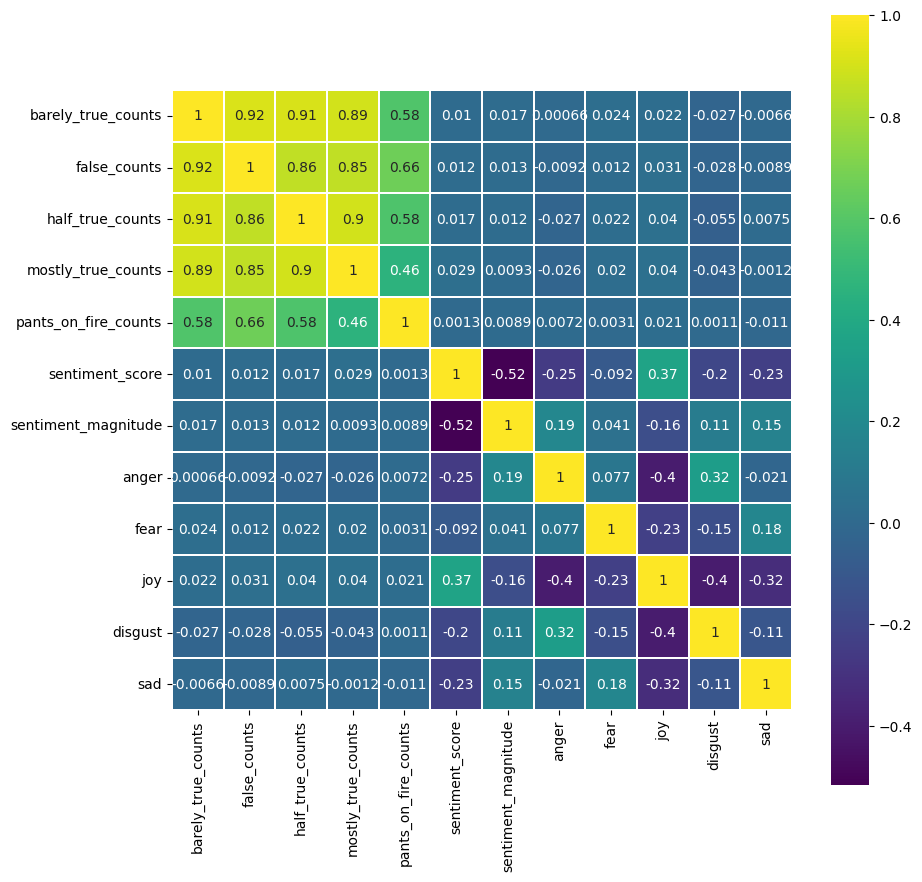

In [53]:
numeric_df_copy = df_new.select_dtypes(include=['int', 'float']).copy()
plot_heatmap(numeric_df_copy)

# Data Modeling

# Data Evaluation